In [1]:
%matplotlib widget

In [2]:
# initialization
from rayoptics.environment import *

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [3]:
def refocus(backfocus):
    sm.gaps[-1].thi = backfocus
    opm.update_model()
    layout_plt.refresh()
    abr_plt.refresh()

In [4]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [5]:
opm = open_model(root_pth/"codev/tests/landscape_lens.seq")
sm = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model

In [6]:
sm.gaps[-1].thi=10.150245
sm.gaps[-1].thi

10.150245

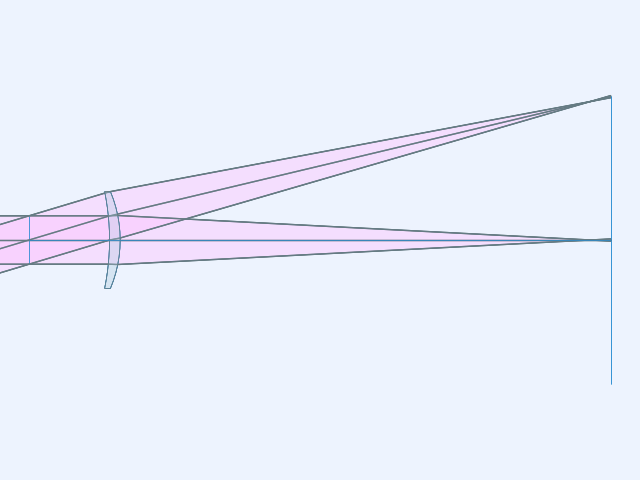

In [7]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False).plot()

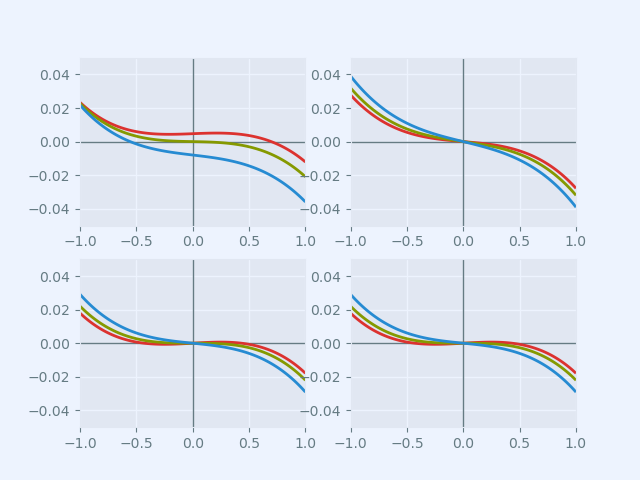

In [8]:
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm,
                     data_type='Ray', scale_type=Fit.User_Scale,
                     user_scale_value=0.05).plot()

In [9]:
bfl=sm.gaps[-1].thi
interact(refocus, backfocus=widgets.FloatSlider(min=bfl-1.0, max=bfl+1.0, step=.025,
                                                description='backfocus', value=bfl,
                                                readout_format='.3f', continuous_update=False))

interactive(children=(FloatSlider(value=10.150245, continuous_update=False, description='backfocus', max=11.15…

<function __main__.refocus(backfocus)>

In [10]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1  3.0000e+09
 Stop:     0.000000      1.66400       air             1     0.50000
    2:    -0.200000     0.220000     N-BK7             1     0.97066
    3:    -0.387041      10.1502       air             1      1.0007
  Img:     0.000000      0.00000                       1      2.9876


In [11]:
osp.defocus

FocusRange(focus_shift=0.0, defocus_range=0.0)

In [12]:
def focuser(defocus):
    osp.defocus.focus_shift = defocus
    opm.update_model()
    abr_plt.refresh()